Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the cleaned dataset
df = pd.read_csv('cleaned_ebay_deals.csv')

# Display the first few rows of the dataset
df.head()

,timestamp,title,price,original_price,shipping,item_url,discount_percentage
0,2025-03-20 23:06:56,Microsoft Xbox Series S,299.00,299.00,Shipping info unavailable,https://www.ebay.com/itm/266190900217?_trkparm...,0.0
1,2025-03-20 23:06:56,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,674.99,Shipping info unavailable,https://www.ebay.com/itm/166613095133?_trkparm...,0.0
2,2025-03-20 23:06:56,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,434.99,434.99,Shipping info unavailable,https://www.ebay.com/itm/226348022590?_trkparm...,0.0
3,2025-03-20 23:06:56,Apple Macbook Air MLY33LL/A 2022 M2 - Magsafe ...,650.00,650.00,Shipping info unavailable,https://www.ebay.com/itm/166206685749?_trkparm...,0.0
4,2025-03-20 23:06:56,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,159.95,159.95,Shipping info unavailable,https://www.ebay.com/itm/185698601733?_trkparm...,0.0


1. Time Series Analysis

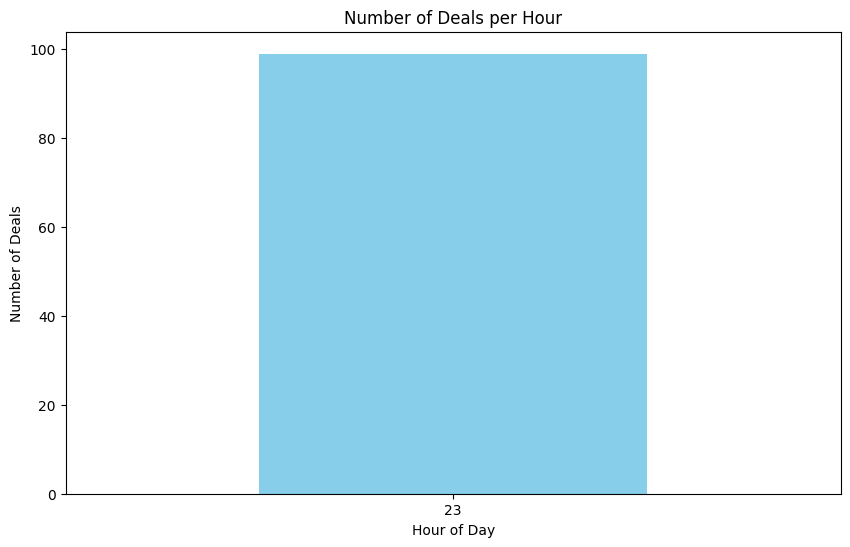

In [3]:
# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the data by timestamp
df = df.sort_values(by='timestamp')

# Extract the hour from each timestamp
df['hour'] = df['timestamp'].dt.hour

# Group the data by hour and count the number of deals
hourly_deals = df.groupby('hour').size()

# Plot a bar chart showing the number of deals per hour
plt.figure(figsize=(10,6))
hourly_deals.plot(kind='bar', color='skyblue')
plt.title('Number of Deals per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()


2. Price and Discount Analysis

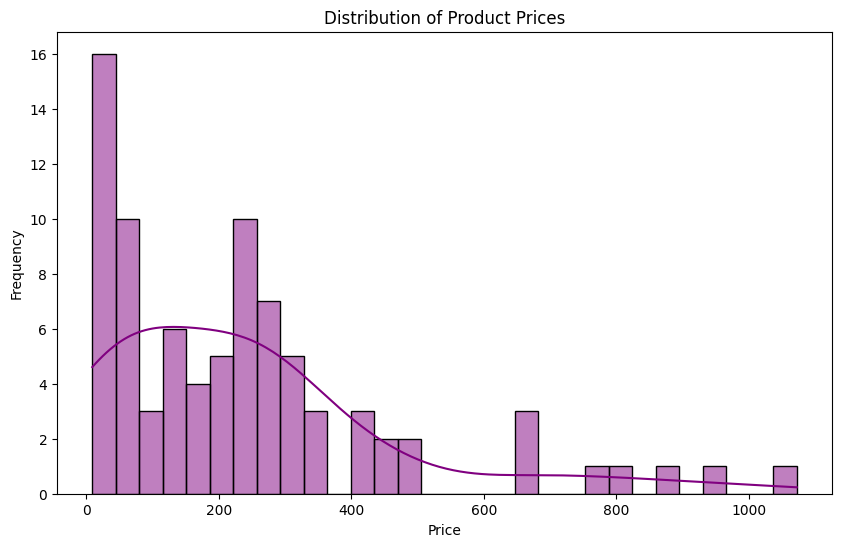

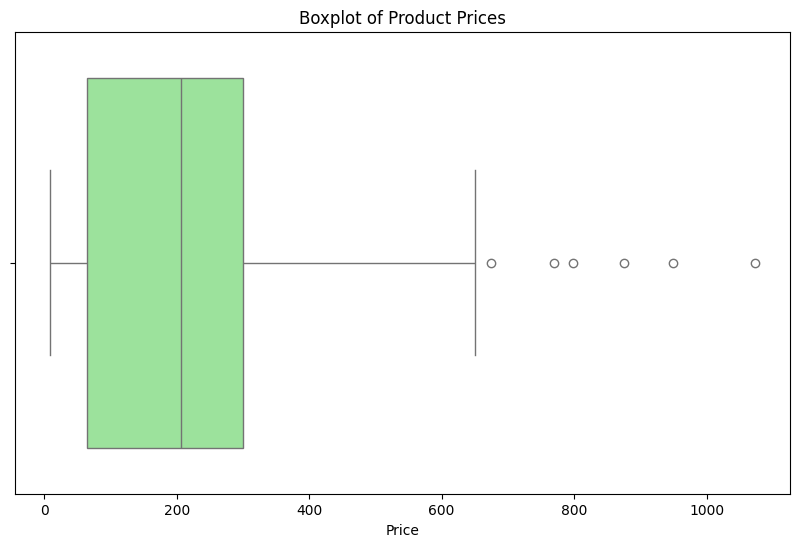

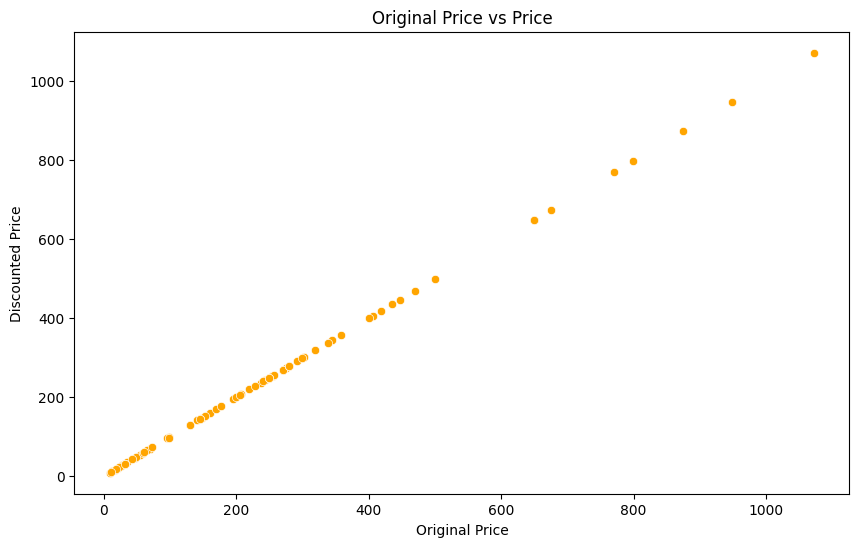

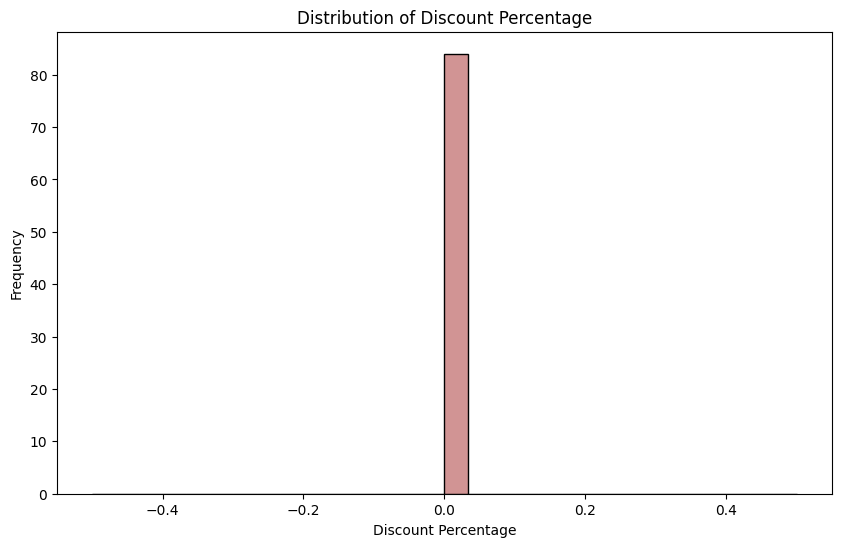

In [4]:
# Plot a histogram of product prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins=30, color='purple')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot a boxplot of product prices
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.show()

# Scatter plot comparing original_price vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['original_price'], y=df['price'], color='orange')
plt.title('Original Price vs Price')
plt.xlabel('Original Price')
plt.ylabel('Discounted Price')
plt.show()

# Plot the distribution of discount_percentage
plt.figure(figsize=(10,6))
sns.histplot(df['discount_percentage'], kde=True, bins=30, color='brown')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()


3. Shipping Information Analysis

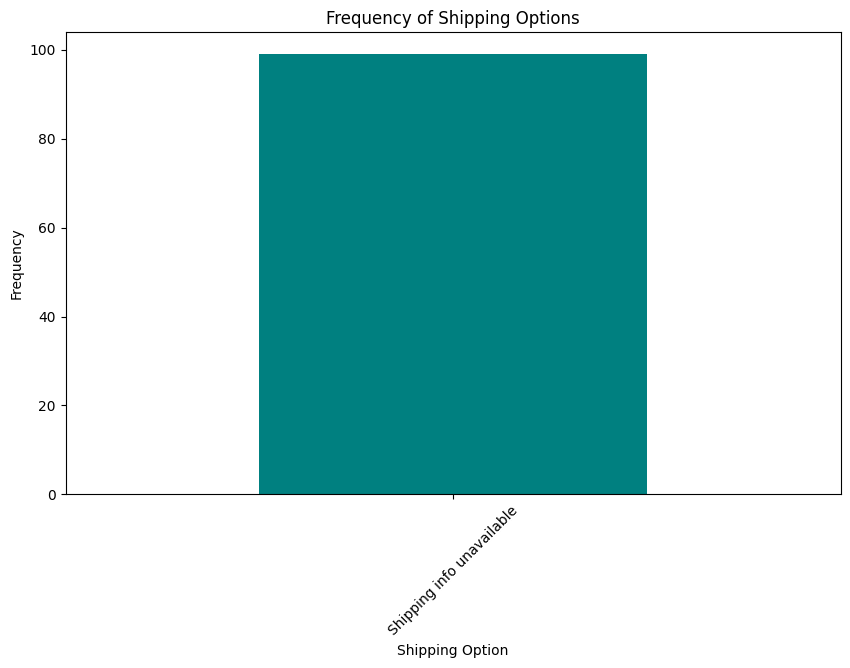

In [5]:
# Count the frequency of different shipping options
shipping_counts = df['shipping'].value_counts()

# Plot a bar chart showing the frequency of shipping options
plt.figure(figsize=(10,6))
shipping_counts.plot(kind='bar', color='teal')
plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


4. Text Analysis on Product Titles

C:\Users\tanyos\AppData\Local\Temp\ipykernel_13720\4243887943.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword', y='Frequency', data=keyword_df, palette='viridis')


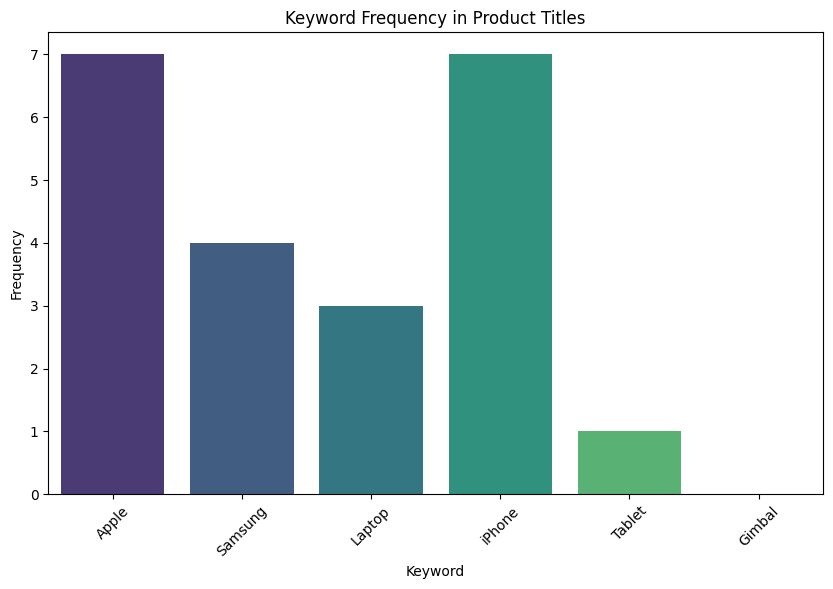

In [6]:
# Define a set of keywords to search for in the product titles
keywords = ['Apple', 'Samsung', 'Laptop', 'iPhone', 'Tablet', 'Gimbal']

# Count how many times each keyword appears in the title column (case-insensitive)
keyword_counts = {keyword: df['title'].str.contains(keyword, case=False).sum() for keyword in keywords}

# Convert the counts into a DataFrame for easier visualization
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Frequency'])

# Plot a bar chart for keyword frequencies
plt.figure(figsize=(10,6))
sns.barplot(x='Keyword', y='Frequency', data=keyword_df, palette='viridis')
plt.title('Keyword Frequency in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


5.Price Difference Analysis

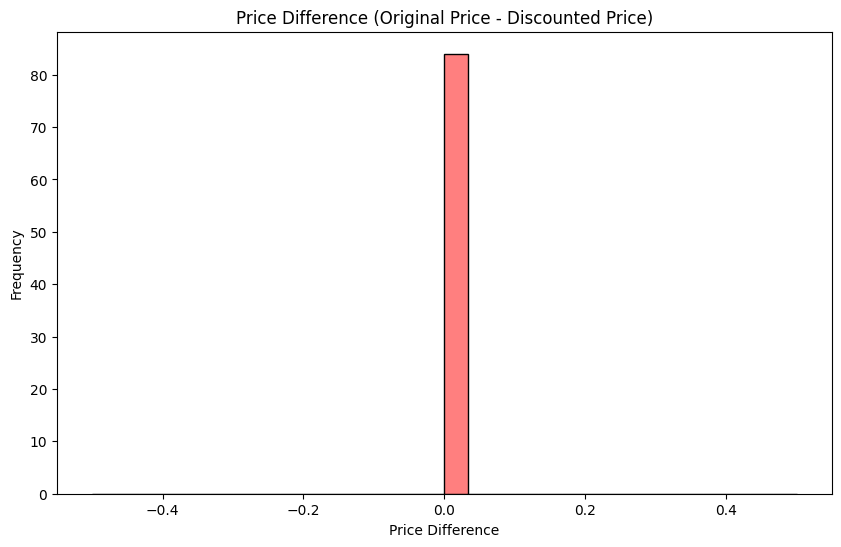

In [7]:
# Compute a new column for the absolute discount (original_price - price)
df['price_difference'] = df['original_price'] - df['price']

# Plot a histogram of the price differences
plt.figure(figsize=(10,6))
sns.histplot(df['price_difference'], kde=True, bins=30, color='red')
plt.title('Price Difference (Original Price - Discounted Price)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()


6. Discount: Top 5 Deals with Highest Discounts

In [8]:
# Sort the dataset by discount_percentage in descending order and display the top 5 deals
top_5_discounts = df.sort_values(by='discount_percentage', ascending=False).head(5)

# Display the top 5 deals
top_5_discounts[['title', 'price', 'original_price', 'discount_percentage']]


,title,price,original_price,discount_percentage
0,Microsoft Xbox Series S,299.00,299.00,0.0
70,Gucci Mens Basket Leather Low-Top Sneakers,199.99,199.99,0.0
59,Nintendo Switch OLED 64GB NEON Red Blue Joy Co...,269.99,269.99,0.0
60,🔥 Nintendo Switch OLED 64GB WHITE Joy Cons New...,269.99,269.99,0.0
61,Nintendo Switch Console with Neon Blue and Neo...,243.33,243.33,0.0
